In [ ]:
import warnings as Nws_Fkewss
Nws_Fkewss.filterwarnings("ignore")
import pandas as Nws_Fkepnn

In [ ]:
Nws_Fke = Nws_Fkepnn.read_csv('purr_FA-KES-Dataset.csv', encoding='unicode_escape')
Nws_Fke

,article_content,labels
0,wed apr syria attack symptoms consistent nerve...,0
1,fri apr homs governor says u attack caused dea...,0
2,sun apr death toll aleppo bomb attack least de...,0
3,wed apr aleppo bomb blast kills six syrian sta...,0
4,sun jul syria rebels dead fighting key aleppo ...,0
...,...,...
793,turkish bombardment kills civilians syria turk...,1
794,martyrs terrorists shell aleppos salah eddin s...,1
795,chemical attack kills five syrians aleppo sana...,0
796,killed russian military chopper shot syria fiv...,1


In [ ]:
Nws_Fke['labels'].value_counts()

1    423
0    375
Name: labels, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as Nws_Fkefid

Nws_Fke_anl = Nws_Fkefid(analyzer='char', ngram_range= (1,1))
Nws_Fke_x = Nws_Fke_anl.fit_transform(Nws_Fke['article_content'].values.astype('U')).toarray()

In [ ]:
print(Nws_Fke_x)

[[0.49834614 0.34500886 0.03184724 ... 0.01669601 0.07224908 0.00296566]
 [0.5257263  0.36434055 0.06166889 ... 0.         0.07100073 0.01929548]
 [0.52844823 0.33529129 0.09926659 ... 0.00539682 0.07662973 0.        ]
 ...
 [0.49609548 0.29837627 0.03989181 ... 0.01064682 0.06118975 0.00945582]
 [0.49691628 0.21605056 0.03632528 ... 0.01066444 0.09373916 0.00473573]
 [0.50391308 0.35312091 0.04236227 ... 0.00847963 0.06497917 0.02259318]]


In [ ]:
Nws_Fke_y = Nws_Fke['labels']

In [ ]:
from imblearn.over_sampling import SMOTE as Nws_Fke_sme
from collections import Counter as Nws_Fke_cttr
print('Original Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))
Nws_Fke_MM = Nws_Fke_sme()
Nws_Fke_x, Nws_Fke_y = Nws_Fke_MM.fit_resample(Nws_Fke_x, Nws_Fke_y)
print('Resampled Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))


Original Nws_Fke datashape Counter({1: 423, 0: 375})
Resampled Nws_Fke datashape Counter({0: 423, 1: 423})


In [ ]:
Nws_Fke_x.shape

(846, 27)

In [ ]:
Nws_Fke_y.shape

(846,)

In [ ]:
from sklearn.model_selection import train_test_split as Nws_Fkennes

Nws_si =0.4
Nws_rs = 31
Nws_sii =0.5

In [ ]:
Nws_Fke_xN, Nws_Fke_xS, Nws_Fke_yN, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_x, Nws_Fke_y, test_size=Nws_si, random_state= Nws_rs)
Nws_Fke_xV, Nws_Fke_xS, Nws_Fke_yV, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_xS, Nws_Fke_yS, test_size= Nws_sii, random_state= Nws_rs)

print(Nws_Fke_xN.shape)
print(Nws_Fke_xV.shape)
print(Nws_Fke_xS.shape)

(507, 27)
(169, 27)
(170, 27)


### Voting classifier

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.8 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import classification_report as Nws_Fkeclc
from sklearn.metrics import confusion_matrix as Nws_Fkecos
from sklearn.metrics import ConfusionMatrixDisplay as Nws_Fkecud
from sklearn.model_selection import GridSearchCV as Nws_Fkegrs
import time as Nws_Fketme
from sklearn.ensemble import VotingClassifier as Nws_Fkevtc
import numpy as Nws_Fkenu
from sklearn.linear_model import LogisticRegression as Nws_Fkelst
from sklearn.linear_model import PassiveAggressiveClassifier as Nws_Fkepvag
from sklearn.svm import LinearSVC as Nws_Fkelisv
from xgboost import XGBClassifier as Nws_Fkexgrb
from lightgbm import LGBMClassifier as Nws_Fkeligb
from catboost import CatBoostClassifier as Nws_Fkecttb

#### Logistic Regression, Passive Aggressive Classifier & XGBM

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkelst(C=1.0,penalty=None,solver='sag')

Nws_Fke_Mdl2 = Nws_Fkepvag(C=1.0,max_iter=1000,tol=0.001)

Nws_Fke_Mdl3 = Nws_Fkexgrb(learning_rate=0.01,n_estimators=20,subsample=0.03)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('LR', Nws_Fke_Mdl1),('PA', Nws_Fke_Mdl2), ('XGB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
[CV 1/2; 1/2] END ..................voting=hard;, score=0.680 total time=   0.1s
[CV 2/2; 1/2] START voting=hard.................................................
[CV 2/2; 1/2] END ..................voting=hard;, score=0.620 total time=   0.0s
[CV 1/2; 2/2] START voting=soft.................................................
[CV 1/2; 2/2] END ....................voting=soft;, score=nan total time=   0.0s
[CV 2/2; 2/2] START voting=soft.................................................
[CV 2/2; 2/2] END ....................voting=soft;, score=nan total time=   0.0s
Best parameters-Nws_Fke : {'voting': 'hard'}
Best Score :  0.65



 training period: 0.18846559524536133 

              precision    recall  f1-score   support

           0       0.52      0.28      0.37        82
           1       0.53      0.76      0.62        87

    accuracy                           0.53       169
   macro avg       0.53      0.52      0.49       169
weighted avg       0.53      0.53      0.50       169


 validation period: 0.1296067237854004 



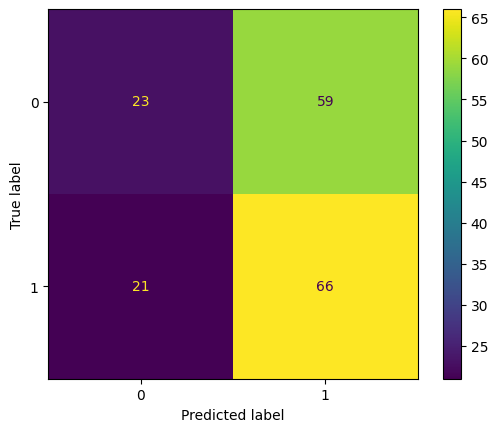

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('LR', Nws_Fke_Mdl1),('PA', Nws_Fke_Mdl2), ('XGB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.46      0.18      0.26        88
           1       0.47      0.77      0.58        82

    accuracy                           0.46       170
   macro avg       0.46      0.48      0.42       170
weighted avg       0.46      0.46      0.41       170


 testing period: 0.21872234344482422 



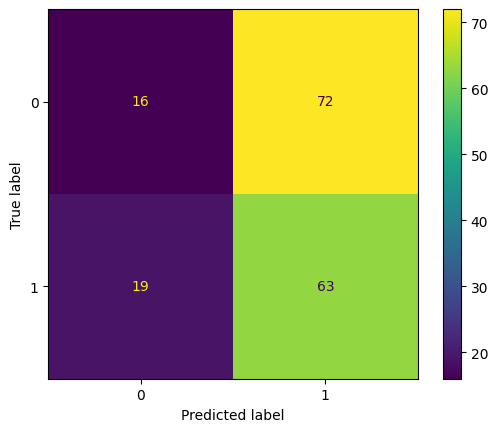

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Passive Aggressive Classifier, LinearSVC & XGBM

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkepvag(C=1.0,max_iter=1000,tol=0.001)

Nws_Fke_Mdl2 = Nws_Fkelisv(C=2.0,loss='squared_hinge',penalty='l2')

Nws_Fke_Mdl3 = Nws_Fkexgrb(learning_rate=0.01,n_estimators=20,subsample=0.03)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('PA', Nws_Fke_Mdl1),('LSVC', Nws_Fke_Mdl2), ('XGB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
[CV 1/2; 1/2] END ..................voting=hard;, score=0.640 total time=   0.0s
[CV 2/2; 1/2] START voting=hard.................................................
[CV 2/2; 1/2] END ..................voting=hard;, score=0.500 total time=   0.0s
[CV 1/2; 2/2] START voting=soft.................................................
[CV 1/2; 2/2] END ....................voting=soft;, score=nan total time=   0.0s
[CV 2/2; 2/2] START voting=soft.................................................
[CV 2/2; 2/2] END ....................voting=soft;, score=nan total time=   0.0s
Best parameters-Nws_Fke : {'voting': 'hard'}
Best Score :  0.5700000000000001



 training period: 0.04797053337097168 

              precision    recall  f1-score   support

           0       0.49      0.27      0.35        82
           1       0.52      0.74      0.61        87

    accuracy                           0.51       169
   macro avg       0.50      0.50      0.48       169
weighted avg       0.50      0.51      0.48       169


 validation period: 0.06974601745605469 



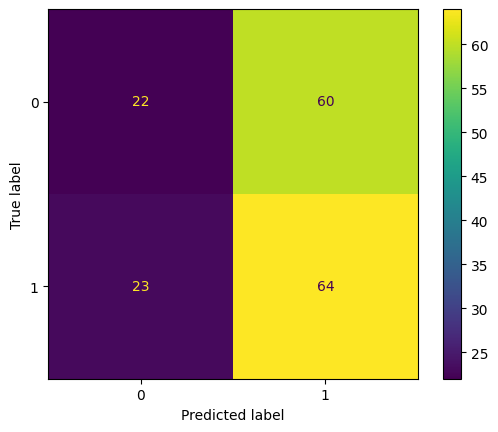

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('PA', Nws_Fke_Mdl1),('LSVC', Nws_Fke_Mdl2), ('XGB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.43      0.18      0.26        88
           1       0.46      0.74      0.57        82

    accuracy                           0.45       170
   macro avg       0.45      0.46      0.41       170
weighted avg       0.45      0.45      0.41       170


 testing period: 0.12188267707824707 



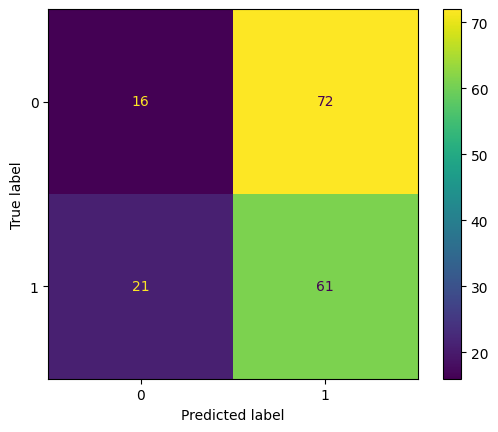

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Logistic Regression, Passive Aggressive Classifier & LightGBM

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkelst(C=1.0,penalty=None,solver='sag')

Nws_Fke_Mdl2 = Nws_Fkepvag(C=1.0,max_iter=1000,tol=0.001)

Nws_Fke_Mdl3 = Nws_Fkeligb(max_depth=3,n_estimators=30,num_leaves=2)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('LR', Nws_Fke_Mdl1),('PA', Nws_Fke_Mdl2), ('LGB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
[LightGBM] [Info] Number of positive: 25, number of negative: 25
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[CV 1/2; 1/2] END ..................voting=hard;, score=0.580 total time=   0.1s
[CV 2/2; 1/2] START voting=hard.................................................
[LightGBM] [Info] Number of positive: 24, number of negative: 26
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to

[LightGBM] [Info] Number of positive: 254, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4402
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500986 -> initscore=0.003945
[LightGBM] [Info] Start training from score 0.003945

 training period: 0.05099201202392578 

              precision    recall  f1-score   support

           0       0.53      0.72      0.61        82
           1       0.60      0.40      0.48        87

    accuracy                           0.56       169
   macro avg       0.57      0.56      0.55       169
weighted avg       0.57      0.56      0.55       169


 validation period: 0.061712026596069336 



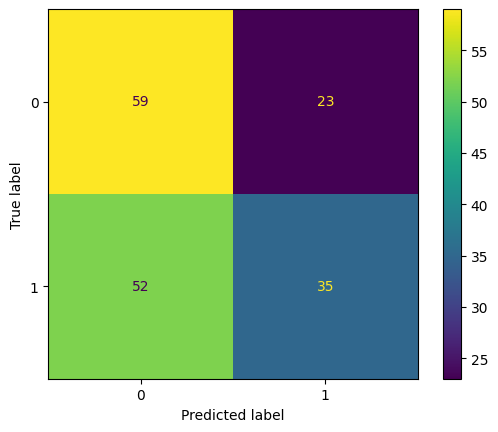

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('LR', Nws_Fke_Mdl1),('PA', Nws_Fke_Mdl2), ('LGB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.49      0.61      0.54        88
           1       0.42      0.30      0.35        82

    accuracy                           0.46       170
   macro avg       0.46      0.46      0.45       170
weighted avg       0.46      0.46      0.45       170


 testing period: 0.11979126930236816 



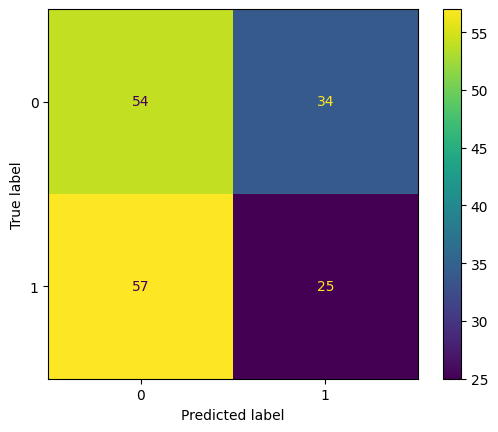

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Passive Aggressive Classifier, LinearSVC & LightGBM

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkepvag(C=1.0,max_iter=1000,tol=0.001)

Nws_Fke_Mdl2 = Nws_Fkelisv(C=2.0,loss='squared_hinge',penalty='l2')

Nws_Fke_Mdl3 = Nws_Fkeligb(max_depth=3,n_estimators=30,num_leaves=2)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('PA', Nws_Fke_Mdl1),('LSVC', Nws_Fke_Mdl2), ('LGB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
[LightGBM] [Info] Number of positive: 25, number of negative: 25
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[CV 1/2; 1/2] END ..................voting=hard;, score=0.620 total time=   0.1s
[CV 2/2; 1/2] START voting=hard.................................................
[LightGBM] [Info] Number of positive: 24, number of negative: 26
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 467
[LightGBM

[LightGBM] [Info] Number of positive: 254, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4402
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500986 -> initscore=0.003945
[LightGBM] [Info] Start training from score 0.003945

 training period: 0.03405356407165527 

              precision    recall  f1-score   support

           0       0.53      0.72      0.61        82
           1       0.60      0.40      0.48        87

    accuracy                           0.56       169
   macro avg       0.57      0.56      0.55       169
weighted avg       0.57      0.56      0.55       169


 validation period: 0.05807662010192871 



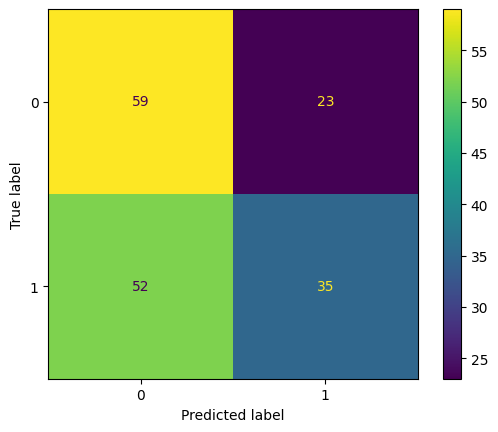

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('PA', Nws_Fke_Mdl1),('LSVC', Nws_Fke_Mdl2), ('LGB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.49      0.65      0.56        88
           1       0.43      0.28      0.34        82

    accuracy                           0.47       170
   macro avg       0.46      0.46      0.45       170
weighted avg       0.46      0.47      0.45       170


 testing period: 0.10883712768554688 



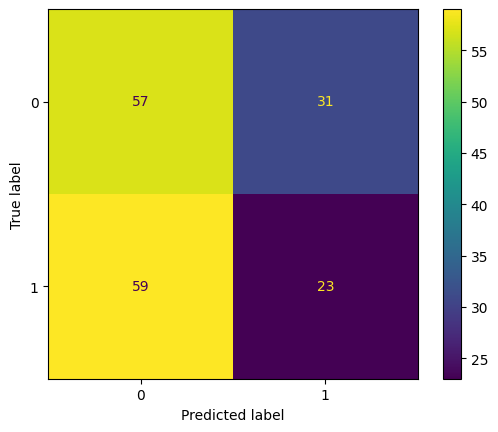

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### LinearSVC, Logistic Regression & Catboost

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkelisv(C=2.0,loss='squared_hinge',penalty='l2')

Nws_Fke_Mdl2 = Nws_Fkelst(C=1.0,penalty=None,solver='sag')

Nws_Fke_Mdl3 = Nws_Fkecttb(learning_rate=0.04,max_depth=6,n_estimators=70)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('LSVC', Nws_Fke_Mdl1),('LR', Nws_Fke_Mdl2), ('CB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
0:	learn: 0.6724358	total: 55.3ms	remaining: 3.82s
1:	learn: 0.6549104	total: 62.8ms	remaining: 2.14s
2:	learn: 0.6392651	total: 69.8ms	remaining: 1.56s
3:	learn: 0.6229757	total: 78.8ms	remaining: 1.3s
4:	learn: 0.6049729	total: 87.3ms	remaining: 1.13s
5:	learn: 0.5904629	total: 108ms	remaining: 1.15s
6:	learn: 0.5759887	total: 114ms	remaining: 1.03s
7:	learn: 0.5586609	total: 127ms	remaining: 984ms
8:	learn: 0.5495873	total: 133ms	remaining: 899ms
9:	learn: 0.5323206	total: 137ms	remaining: 822ms
10:	learn: 0.5188046	total: 144ms	remaining: 772ms
11:	learn: 0.5062022	total: 147ms	remaining: 713ms
12:	learn: 0.4949831	total: 152ms	remaining: 667ms
13:	learn: 0.4792620	total: 156ms	remaining: 623ms
14:	learn: 0.4706814	total: 163ms	remaining: 598ms
15:	learn: 0.4630911	total: 167ms	remaining: 564ms
16:	learn: 0.4526850	total: 173ms	remaining: 539ms

0:	learn: 0.6864792	total: 10ms	remaining: 690ms
1:	learn: 0.6797988	total: 17.7ms	remaining: 602ms
2:	learn: 0.6744596	total: 25.2ms	remaining: 563ms
3:	learn: 0.6693431	total: 32.7ms	remaining: 540ms
4:	learn: 0.6643216	total: 40.1ms	remaining: 521ms
5:	learn: 0.6576818	total: 47.6ms	remaining: 508ms
6:	learn: 0.6531606	total: 55.4ms	remaining: 498ms
7:	learn: 0.6506549	total: 62.9ms	remaining: 488ms
8:	learn: 0.6447378	total: 70.2ms	remaining: 476ms
9:	learn: 0.6392693	total: 77.8ms	remaining: 467ms
10:	learn: 0.6340956	total: 85.1ms	remaining: 456ms
11:	learn: 0.6291449	total: 92.6ms	remaining: 448ms
12:	learn: 0.6242645	total: 99.6ms	remaining: 437ms
13:	learn: 0.6200728	total: 107ms	remaining: 428ms
14:	learn: 0.6155876	total: 114ms	remaining: 418ms
15:	learn: 0.6129455	total: 122ms	remaining: 411ms
16:	learn: 0.6082679	total: 129ms	remaining: 403ms
17:	learn: 0.6035134	total: 137ms	remaining: 395ms
18:	learn: 0.6015673	total: 144ms	remaining: 387ms
19:	learn: 0.5983551	total: 15

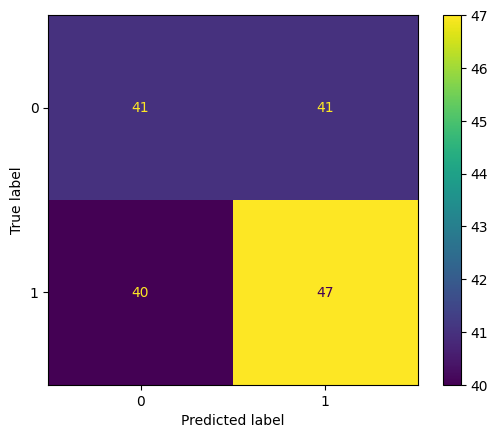

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('LSVC', Nws_Fke_Mdl1),('LR', Nws_Fke_Mdl2), ('CB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.44      0.41      0.43        88
           1       0.42      0.45      0.43        82

    accuracy                           0.43       170
   macro avg       0.43      0.43      0.43       170
weighted avg       0.43      0.43      0.43       170


 testing period: 0.2051384449005127 



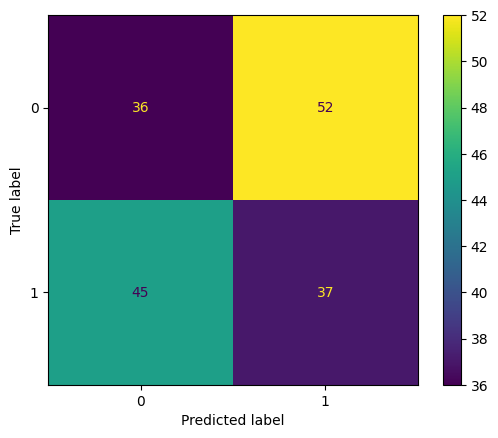

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")